# <font color='brown'>楼 + 机器学习实战</font>

# 挑战：使用 TensorFlow 搭建多层神经网络

## 挑战介绍

上一个实验中，我们对 TensorFlow 的使用进行了介绍，相信你已经对张量、会话、计算图等概念比较熟悉了。在本次挑战中，我们将尝试使用 TensorFlow 来搭建一个多层神经网络结构。不必担心，这里并不会涉及到深度神经网络，重点还是在于熟悉 TensorFlow 的使用。

## 挑战知识点

- TensorFlow 原理及使用
- 多层神经网络

---

## 挑战内容

第二周的课程中，我们学习了感知机和人工神经网络的知识。实验中，我们对一个经典的神经网络结构进行了介绍，像下面这种包含有 1 个输入层，一个隐含层以及一个输出层。

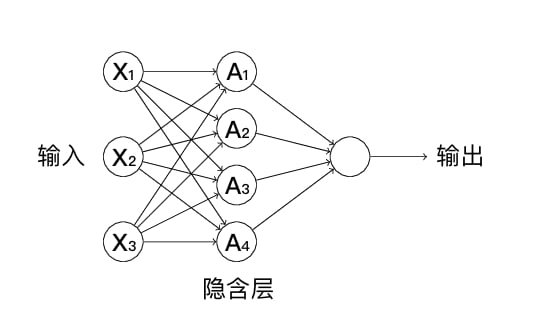

其实，像上图中的隐含层在深度学习中又有一个名字，那就叫全连接层。正如其名，**全连接层指的是其每一个节点都与上一层每个节点相连**。与此同时，为了方便，我们通常会向全连接层中封装激活函数。

### 实现全连接层

**<font color='red'>挑战</font>：使用 TensorFlow 提到的数学运算方法实现全连接层，并添加 Relu 作为激活函数。**

**<font color='blue'>规定</font>**：只能使用 TensorFlow 模块提供的类和方法。

**<font color='green'>提示</font>**：可能会用到 `matmul` 计算矩阵乘法，以及 `tf.nn.relu()` 激活函数方法。

In [ ]:
import tensorflow as tf

def fully_connected(input_layer, weights, biases):
    """
    参数:
    input_layer -- 输入层 Variable
    weights -- 权重项 Variable
    biases -- 截距项 Variable
    
    返回:
    output -- 输出层 Variable
    """
    ### 代码开始 ### (≈ 2 行代码)
    layer = tf.add(tf.matmul(input_layer, weights), biases)
    output = tf.nn.relu(layer)
    ### 代码结束 ###
    return output

**运行测试：**

In [ ]:
input_layer = tf.Variable(tf.random_normal([4, 4], stddev=10, seed=10))
weights = tf.Variable(tf.random_normal([4, 2], stddev=10, seed=10))
biases = tf.Variable(tf.random_normal([2], stddev=10, seed=10))
fully_connected(input_layer, weights, biases)

**期望输出：**(Relu 后面的数字可能会由于多次运行而变化)

<center> ` <tf.Tensor 'Relu:0' shape=(4, 2) dtype=float32> ` </center>

此时如果我们想查看执行的结果，该怎样做呢？

---

**<font color='red'>挑战</font>：得到上面测试数据在全连接层中的输出结果。**

**<font color='green'>提示</font>**：建立会话并执行。

In [ ]:
### 代码开始 ### (≈ 4 行代码)
init = tf.global_variables_initializer()
with tf.Session() as sess:
    sess.run(init)
    output = sess.run(fully_connected(input_layer, weights, biases))
### 代码结束 ###
output

In [ ]:
### 代码开始 ### (≈ 4 行代码)
with tf.Session() as sess:
    tf.global_variables_initializer().run()
    output = sess.run(fully_connected(input_layer, weights, biases))
### 代码结束 ###
output

**期望输出：**

    array([[533.48895 ,  29.652111],
           [ 40.384315, 190.68837 ],
           [  0.      , 191.46455 ],
           [117.58268 ,  19.653671]], dtype=float32)

### 数据预处理

前面的挑战中，我们使用过手写字符数据集 Digits。该数据集包含有 `1797` 张数字 `0` 到 `9` 的手写字符图像转换后的数字矩阵，目标值是 `0-9`。为了方便，这里直接使用 scikit-learn 提供的 `load_digits` 方法加载该数据集。

In [ ]:
import numpy as np
from sklearn import datasets

digits = datasets.load_digits()

加载完成的 digits 数据集中包含 3 个属性：

|  属性  |                  描述                  |
|:------:|:--------------------------------------:|
| `images` | 8x8 矩阵，记录每张手写字符图像对应的像素灰度值 |
|  `data`  | 将 images 对应的 8x8 矩阵转换为行向量 |
| `target` |     记录 1797 张影像各自代表的数字     |

本次挑战不涉及模型评估，所以这里不再划分训练集和测试集，直接使用全部数据传入模型训练。

这里，我们需要将数据从 ndarray 处理为 Variable Tensor。

In [ ]:
train_x = tf.Variable(digits.data, dtype="float32")
train_y = tf.one_hot(tf.Variable(digits.target), depth=10)

你可能会疑惑上面针对 `train_y` 的处理方式，这里我们使用到一种叫做独热编码的手段。独热编码的过程如下图所示。一般情况下面对类别的特征，你可能想到的是把苹果、香蕉、菠萝依次替换成 `1, 2, 3` 数值传入模型训练。实际上，如果模型对数值大小敏感，这种方式是存在问题的。

独热编码的过程中，我们的特征从 `1` 列扩充为 `3` 列。如果特征是苹果，那么苹果对应的值为 `1`，其余为 `0`。这样既可以避免数值大小对训练过程的影响，还可以扩充训练集。所以，独热编码好处多多。

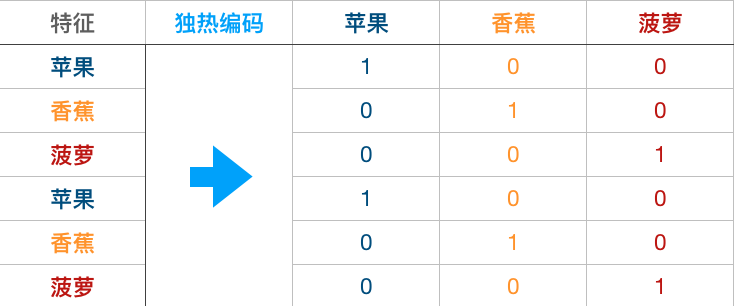</img>

本次挑战中，我们针对目标值进行独热编码当然不是上面扩充数据集的用途。针对目标值独热编码的原因下面细说。

### 搭建多层神经网络实现手写字符识别

前面的挑战中，我们是用 scikit-learn 搭建了一个人工神经网络对手写字符进行了分类。今天的挑战中，我们会使用上面通过 TensorFlow 构建的全连接层搭建一个多层神经网络用于分类。挑战拟构建多层神经网络结构如下：

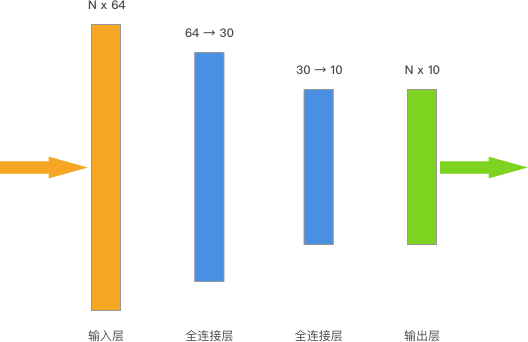

你可以看到，我们输入数据的 shape 是 `N * 64`，N 代表训练集的数据量，准确来讲就是 `(1797, 64)`。上面的神经网络一共有 2 个全连接层，其中第一层将输入数据处理成 `(1797, 30)`，接着第二个全连接层将训练数据处理成 `(1797, 10)`，最后直接作为输出层输出。

上面留下一个问题，那就是「为什么针对目标值进行独热编码？」你可以发现，我们构建的神经网络最后的输出是 `(1797, 10)`，而原目标值（`data.target`）的 `shape` 为 `(1797, 1)`。由于原目标值中正好包含 `1` 到 `10` 的数字类别，我们通过独热编码可以将 `(1797, 1)` 扩充为  `(1797, 10)` 的形状。这样做的目的是方便后面定义损失函数并进行优化计算。

你可以试一试：

In [ ]:
digits.target.shape, train_y.shape # 查看前后形状的变化

可以看到，目标值的确是由 `(1797, 1)` 扩充为  `(1797, 10)` 的形状。

接下来，开始搭建神经网络结构。

---

**<font color='red'>挑战</font>：使用上面实现的全连接层函数搭建如图规定的神经网络结构。**

**<font color='blue'>规定</font>**：全连接层中，初始化权重和偏置项均为 `1`。第一层将输入数据处理成 `(1797, 30)`，接着第二个全连接层将训练数据处理成 `(1797, 10)`

**<font color='green'>提示</font>**：可能会用到 `tf.ones()` 生成全为 1 的张量。

In [ ]:
"""完成 2 个全连接层
"""

input_layer = train_x # 输入层

### 代码开始 ### (≈ 4 行代码)

# 全连接层 1
weight_1 = tf.Variable(tf.ones([64, 30]))
bias_1 = tf.Variable(tf.ones([30]))
fc_layer_1 = fully_connected(input_layer, weight_1, bias_1)

# 全连接层 2
weight_2 = tf.Variable(tf.ones([30, 10]))
bias_2 = tf.Variable(tf.ones([10]))
fc_layer_2 = fully_connected(fc_layer_1, weight_2, bias_2)

### 代码结束 ###
output_layer = fc_layer_2 # 输出层

此时，我们需要指定损失函数和优化器。其中，损失函数使用到交叉熵损失函数。交叉熵（Cross Entropy）是信息论中一个重要概念，主要用于度量两个概率分布间的差异性信息。交叉熵损失函数会随着正确类别的概率不断降低，返回的损失值越来越大，所以被用于分类问题。

下面，我们已经给出了交叉熵损失函数的定义方法，你只需要补充优化器的相关设定即可。

---

**<font color='red'>挑战</font>：完成优化器设定。**

**<font color='blue'>规定</font>**：使用梯度下降优化器，设置学习率为 `0.5`，其他使用默认参数即可。

In [ ]:
# 交叉熵损失函数，该步骤无需理解，后面实验详细介绍
loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(labels=train_y, logits=output_layer))

# 定义损失函数和优化器
### 代码开始 ### (≈ 1～2 行代码)

train_step = tf.train.GradientDescentOptimizer(.5).minimize(loss)

### 代码结束 ###

最后，我们就可以开始训练模型了。

---

**<font color='red'>挑战</font>：开始训练模型，执行优化迭代过程，最后绘制出损失函数值的变化曲线。**

**<font color='blue'>规定</font>**：优化迭代 10 次即可。

**<font color='green'>提示</font>**：需要初始化、建立会话。

In [ ]:
from matplotlib import pyplot as plt
%matplotlib inline

### 代码开始 ### (≈ 8~10 行代码)
loss_list =[]

init = tf.global_variables_initializer()
with tf.Session() as sess:
    sess.run(init)
    for _ in range(10):
        sess.run(train_step)
        loss_list.append(sess.run(loss))

plt.plot(loss_list)
loss_list
### 代码结束 ###

**参考输出：**

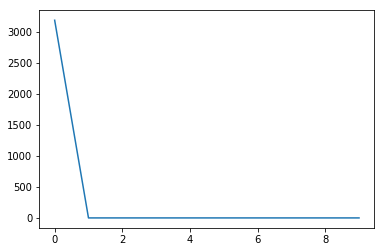

注意，绘图结果无需和上图一致，仅需要损失最终随着迭代同时下降即可。

---

<div style="color: #999;font-size: 12px;font-style: italic;">*本课程内容，由作者授权实验楼发布，未经允许，禁止转载、下载及非法传播。</div>